### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_order_data.csv')
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [2]:
co_df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [3]:
co_df.columns = ['ID', 'Date', 'Amount', 'Information', 'OrderID', 'City']
co_df

,ID,Date,Amount,Information,OrderID,City
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [4]:
co_df.sort_values(by='Date', ascending=False)

,ID,Date,Amount,Information,OrderID,City
999,4759,2023-06-10,804.28,Product D,467544,New York
990,6570,2023-06-10,125.84,Product C,664032,Paris
981,6761,2023-06-10,571.97,Product B,690462,London
982,3213,2023-06-10,700.65,Product B,719531,Tokyo
983,2625,2023-06-10,765.11,Product B,377501,New York
...,...,...,...,...,...,...
1,2188,2023-04-11,463.70,Product A,176819,London
5,8483,2023-04-11,375.23,Product C,691194,Paris
6,8317,2023-04-11,272.56,Product B,826847,New York
7,6911,2023-04-11,433.33,Product C,963918,Tokyo


In [5]:
# 오늘(2023-06-10)로부터 지난 구매 날짜 구하기
co_df['Date'] = pd.to_datetime(co_df['Date']).apply(lambda x: (pd.to_datetime('2023-06-10') - x).days)
co_df

,ID,Date,Amount,Information,OrderID,City
0,8814,60,943.31,Product C,890075,Tokyo
1,2188,60,463.70,Product A,176819,London
2,4608,60,80.28,Product A,340062,New York
3,2559,60,221.29,Product A,239145,London
4,9482,60,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,0,759.62,Product B,275284,London
996,6669,0,941.50,Product C,987025,New York
997,8836,0,545.36,Product C,512842,London
998,1440,0,729.94,Product B,559753,Paris


In [6]:
co_df['ID'].value_counts()

ID
7363    3
4804    3
5557    3
1519    2
5634    2
       ..
1341    1
8822    1
9442    1
5706    1
4759    1
Name: count, Length: 946, dtype: int64

In [7]:
# Recency
rfm_r = co_df.groupby('ID')['Date'].min().reset_index()
rfm_r.columns = ['ID', 'Recency']

# Frequency
rfm_f = co_df['ID'].value_counts().reset_index()
rfm_f.columns = ['ID', 'Frequency']

# Monetary
rfm_m = co_df.groupby('ID')['Amount'].sum().reset_index()
rfm_m.columns = ['ID', 'Monetary']

rfm = pd.merge(rfm_r, rfm_f, on='ID')
rfm = pd.merge(rfm, rfm_m, on='ID')

rfm

,ID,Recency,Frequency,Monetary
0,1011,33,2,1129.02
1,1025,21,1,359.29
2,1029,0,1,704.99
3,1046,43,1,859.82
4,1049,13,1,225.72
...,...,...,...,...
941,9941,42,1,960.53
942,9950,38,1,679.11
943,9954,12,1,798.01
944,9985,57,1,36.10


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [9]:
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,ID,Recency,Frequency,Monetary
0,1011,0.450000,0.5,0.471795
1,1025,0.650000,0.0,0.146647
2,1029,1.000000,0.0,0.292677
3,1046,0.283333,0.0,0.358080
4,1049,0.783333,0.0,0.090224
...,...,...,...,...
941,9941,0.300000,0.0,0.400622
942,9950,0.366667,0.0,0.281745
943,9954,0.800000,0.0,0.331970
944,9985,0.050000,0.0,0.010125


In [10]:
# RFM 점수 계산
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,ID,Recency,Frequency,Monetary,TotalScore
0,1011,0.450000,0.5,0.471795,1.421795
1,1025,0.650000,0.0,0.146647,0.796647
2,1029,1.000000,0.0,0.292677,1.292677
3,1046,0.283333,0.0,0.358080,0.641413
4,1049,0.783333,0.0,0.090224,0.873558
...,...,...,...,...,...
941,9941,0.300000,0.0,0.400622,0.700622
942,9950,0.366667,0.0,0.281745,0.648411
943,9954,0.800000,0.0,0.331970,1.131970
944,9985,0.050000,0.0,0.010125,0.060125


In [11]:
co_rfm_df = pd.merge(co_df, rfm, on='ID')
co_rfm_df

,ID,Date,Amount,Information,OrderID,City,Recency,Frequency,Monetary,TotalScore
0,8814,60,943.31,Product C,890075,Tokyo,0.0,0.0,0.393348,0.393348
1,2188,60,463.70,Product A,176819,London,0.0,0.0,0.190752,0.190752
2,4608,60,80.28,Product A,340062,New York,0.0,0.0,0.028788,0.028788
3,2559,60,221.29,Product A,239145,London,0.0,0.0,0.088353,0.088353
4,9482,60,739.56,Product A,194545,Paris,0.0,0.0,0.307280,0.307280
...,...,...,...,...,...,...,...,...,...,...
995,2970,0,759.62,Product B,275284,London,1.0,0.0,0.315754,1.315754
996,6669,0,941.50,Product C,987025,New York,1.0,0.0,0.392583,1.392583
997,8836,0,545.36,Product C,512842,London,1.0,0.0,0.225246,1.225246
998,1440,0,729.94,Product B,559753,Paris,1.0,0.0,0.303216,1.303216


In [31]:
import numpy as np

l1, l2 = np.percentile(co_rfm_df['TotalScore'], [40, 90])
print(l1, l2)

0.6500394257359942 1.3033258706047346


In [32]:
def get_level(x):
    if x <= l1:
        return 3
    if x <= l2:
        return 2
    return 1

In [33]:
co_rfm_df['Level'] = co_rfm_df['TotalScore'].apply(get_level)
co_rfm_df

,ID,Date,Amount,Information,OrderID,City,Recency,Frequency,Monetary,TotalScore,Level
0,8814,60,943.31,Product C,890075,Tokyo,0.0,0.0,0.393348,0.393348,3
1,2188,60,463.70,Product A,176819,London,0.0,0.0,0.190752,0.190752,3
2,4608,60,80.28,Product A,340062,New York,0.0,0.0,0.028788,0.028788,3
3,2559,60,221.29,Product A,239145,London,0.0,0.0,0.088353,0.088353,3
4,9482,60,739.56,Product A,194545,Paris,0.0,0.0,0.307280,0.307280,3
...,...,...,...,...,...,...,...,...,...,...,...
995,2970,0,759.62,Product B,275284,London,1.0,0.0,0.315754,1.315754,1
996,6669,0,941.50,Product C,987025,New York,1.0,0.0,0.392583,1.392583,1
997,8836,0,545.36,Product C,512842,London,1.0,0.0,0.225246,1.225246,2
998,1440,0,729.94,Product B,559753,Paris,1.0,0.0,0.303216,1.303216,2


In [34]:
co_rfm_df['Level'] = co_rfm_df['Level'].replace([3, 2, 1], ['Bronze', 'Silver', 'Gold'])
co_rfm_df

,ID,Date,Amount,Information,OrderID,City,Recency,Frequency,Monetary,TotalScore,Level
0,8814,60,943.31,Product C,890075,Tokyo,0.0,0.0,0.393348,0.393348,Bronze
1,2188,60,463.70,Product A,176819,London,0.0,0.0,0.190752,0.190752,Bronze
2,4608,60,80.28,Product A,340062,New York,0.0,0.0,0.028788,0.028788,Bronze
3,2559,60,221.29,Product A,239145,London,0.0,0.0,0.088353,0.088353,Bronze
4,9482,60,739.56,Product A,194545,Paris,0.0,0.0,0.307280,0.307280,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
995,2970,0,759.62,Product B,275284,London,1.0,0.0,0.315754,1.315754,Gold
996,6669,0,941.50,Product C,987025,New York,1.0,0.0,0.392583,1.392583,Gold
997,8836,0,545.36,Product C,512842,London,1.0,0.0,0.225246,1.225246,Silver
998,1440,0,729.94,Product B,559753,Paris,1.0,0.0,0.303216,1.303216,Silver


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold']

print(co_rfm_df['Level'].value_counts())

Level
Silver    500
Bronze    400
Gold      100
Name: count, dtype: int64


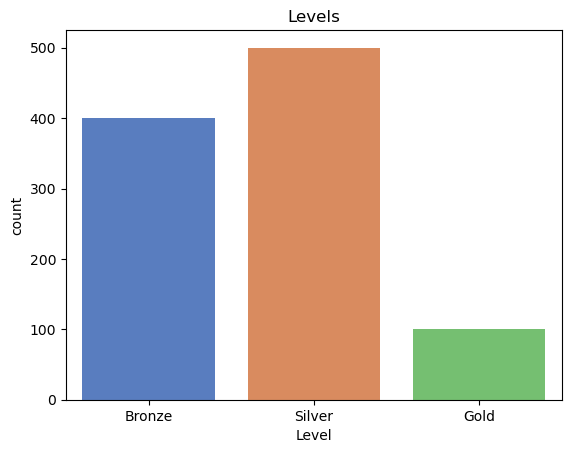

In [36]:
sns.countplot(x='Level', data=co_rfm_df, palette='muted', order=order)
plt.title('Levels')
plt.show()

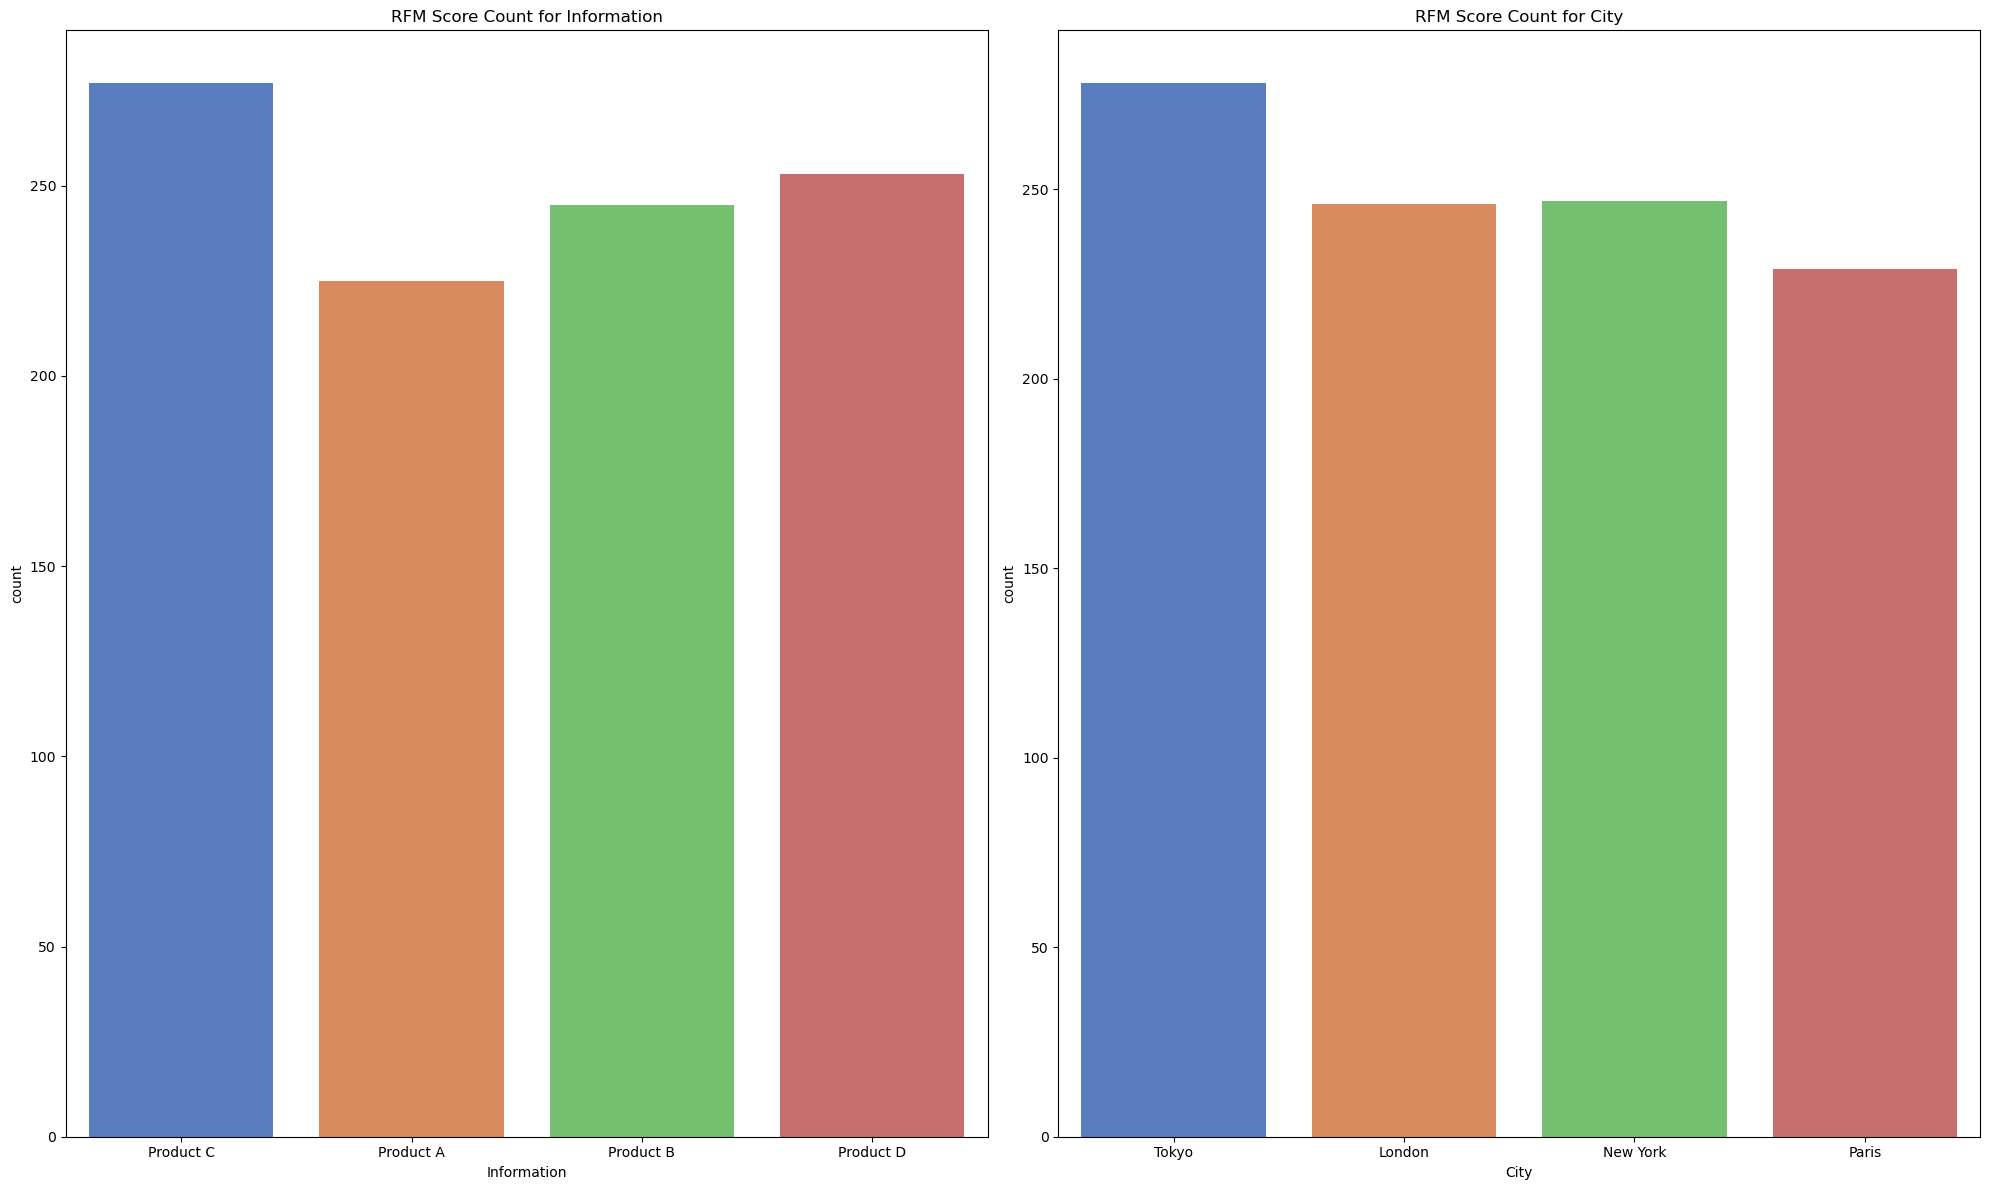

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

for i, col in enumerate(['Information', 'City']):
    sns.countplot(ax=axes[i], x=col, data=co_rfm_df, palette='muted')
    axes[i].set_title(f'RFM Score Count for {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

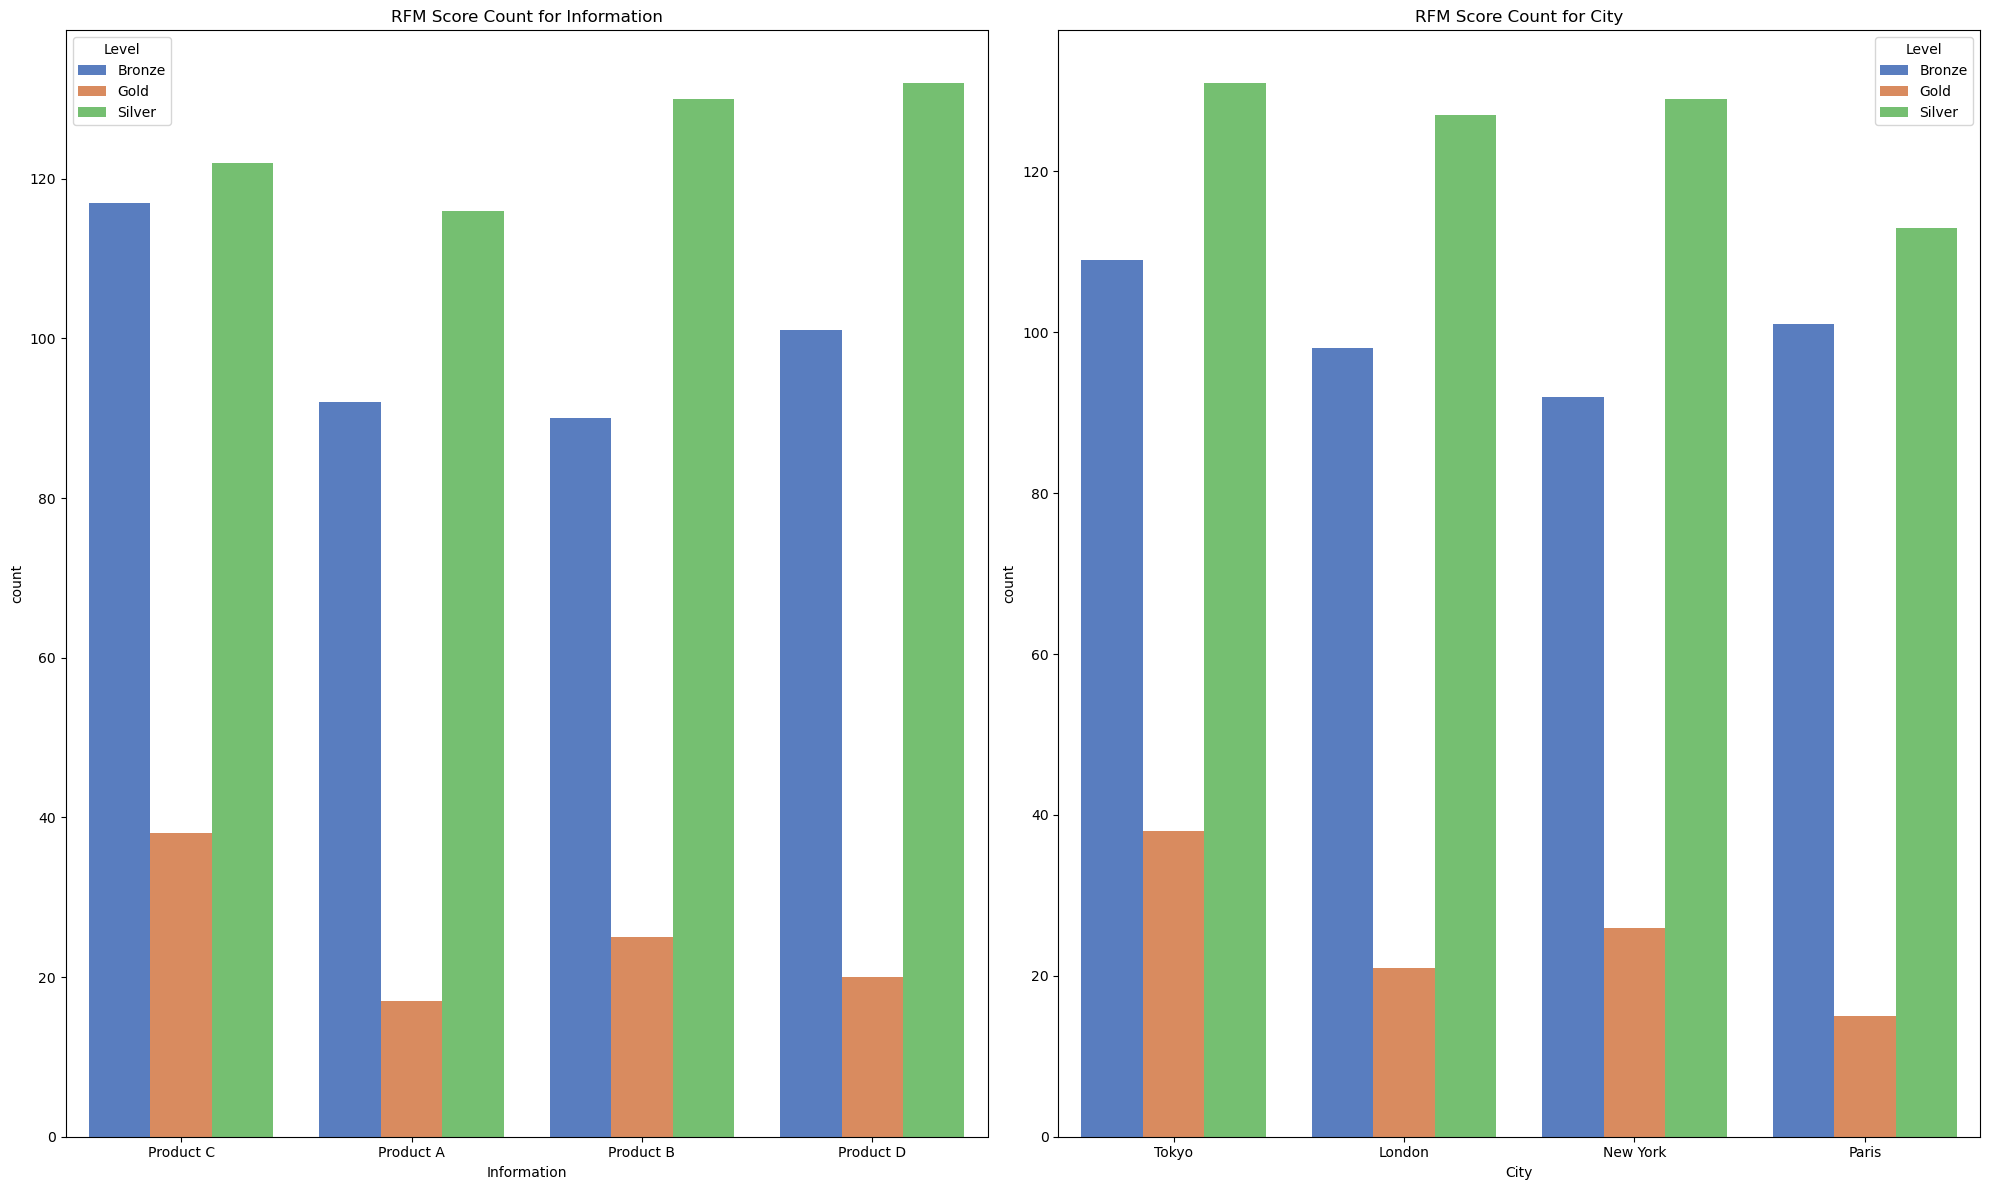

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

for i, col in enumerate(['Information', 'City']):
    sns.countplot(ax=axes[i], x=col, hue='Level', data=co_rfm_df, palette='muted')
    axes[i].set_title(f'RFM Score Count for {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### 마케팅 전략

- 제품 마케팅  
제품 C와 D의 구매량이 높은 것을 고려하여 이 두 제품에 대한 마케팅 활동을 강화할 필요가 있습니다.
제품 C와 D에 대한 마케팅 활동을 통해 A와 B또한 같이 구매량을 높일 수 있는 전략입니다.

- 지역 타겟 마케팅  
도쿄와 뉴욕에 VIP등급이 많은 것으로 보아 해당 지역에서의 프로모션 및 이벤트를 통해 고객들의 만족도를 높일 필요가 있습니다.

- 등급별 마케팅  
고객들을 모두 고려하여 제품과 지역에 따른 다양한 프로모션 및 할인 이벤트를 제공해야 합니다. 이러한 마케팅 전략을 통해 제품 선호도와 지역 선호도를 고려한 타겟 마케팅을 실시하고, 각 등급의 고객들을 모두 고려한 다채로운 마케팅 활동을 펼쳐 고객들의 만족도를 높이고 매출을 증대시킬 수 있을 것으로 기대됩니다.